In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

data preprocessing

In [2]:
# Importing the dataset for training
dataset = pd.read_csv('top-100k.csv')
T = dataset.iloc[:, 1].values

#removing .com, .org ....
def remove_top_level_domain(my_list):
    T_split =[]
    for item in my_list:
        T_sliced = item.split('.')[0]
        T_split.append(T_sliced)
    return(T_split)

T =  remove_top_level_domain(T)
for i in range(10):
    print(T[i])

youtube
facebook
baidu
wikipedia
yahoo
google
reddit
qq
amazon
taobao


Training = calculating a bank of frequency for the ngram from X_train

In [3]:
#takes in a list of words and returns a bank of frequency of the 3grams found in the list. 
#'X_train' is used to generate such bank. When words are domains, they are already stripped of .com.net.org)

def calculate_ngram_frequency_bank(my_set):
         
    #list of all the 3-grams learned
    ngrams=[]
    for n_string in my_set:
        n_string = str(n_string)
        if len(n_string)>4:
            for i in range(len(n_string)-2):
                ngram = n_string[i]+n_string[i+1]+n_string[i+2]
                ngrams.append(ngram)
            
    #disctionary of {3grams:frequency of times the gram appears in the list of words}
    frequency_count = {}
    for item in ngrams :
        if item in frequency_count:
            frequency_count[item] += 1
        else:
            frequency_count[item] = 1
    #calculates the frequency of each 3-gram
    ngram_frequencies= {key: frequency_count[key] / len(frequency_count) for key in frequency_count.keys()}
    
    return ngram_frequencies

ngram_frequency_bank = calculate_ngram_frequency_bank(T)
ngram_frequency_bank

{'you': 0.022757930464296593,
 'out': 0.020147078020973846,
 'utu': 0.005656846960532614,
 'tub': 0.024933640833732215,
 'ube': 0.027239893825333972,
 'fac': 0.008354727818632784,
 'ace': 0.015708628867325183,
 'ceb': 0.0021321961620469083,
 'ebo': 0.012140463861450764,
 'boo': 0.02562986815195161,
 'ook': 0.025977981811061313,
 'bai': 0.004394934946259954,
 'aid': 0.005134676471868065,
 'idu': 0.0020451677472694833,
 'wik': 0.008224185196466647,
 'iki': 0.011618293372786215,
 'kip': 0.0013054262216613724,
 'ipe': 0.005439275923589052,
 'ped': 0.008050128366911796,
 'edi': 0.043122579522214,
 'dia': 0.05169487837779035,
 'yah': 0.0007832557329968235,
 'aho': 0.004220878116705104,
 'hoo': 0.010138810321569993,
 'goo': 0.017666768199817242,
 'oog': 0.009703668247682868,
 'ogl': 0.010486923980679692,
 'gle': 0.014577259475218658,
 'red': 0.02271441625690788,
 'edd': 0.003045994517209869,
 'ddi': 0.004873591227535791,
 'dit': 0.008398242026021496,
 'ama': 0.03376702493364083,
 'maz': 0.004

Calculating domain probability based on the previous training.

In [4]:
#Useful function during test
#splitting the word in ngrams
def splitting_in_ngrams(input_word):
    ngrams_in_word =[]
    input_word=str(input_word)
    for i in range(len(input_word)-2):
        ngram = input_word[i]+input_word[i+1]+input_word[i+2]
        ngram_t = str(ngram)
        ngrams_in_word.append(ngram_t)
    
    return(ngrams_in_word)


In [5]:
#Useful function during test
#associating a frequency to each word
#This is the main metrics calculated in the paper.

def calculate_frequency(input_word_a):    
    value = []
    input_word=str(input_word_a)
    ngrams = splitting_in_ngrams(input_word)

    for idx in ngrams:
        if idx in ngram_frequency_bank:
            value.append(ngram_frequency_bank[idx])
        else:
            value.append(0)
        
#calculating the word frequency as log((product of each n-gram frequency)/lenght)
    word_frequency = np.prod(value) / len(input_word)
    if word_frequency == 0:
        log_word_frequency = -100
    else:
        log_word_frequency = math.log(word_frequency, 10)
    return log_word_frequency



In [6]:
dataset = pd.read_csv('dga_data_ready.csv')
dataset

,isDGA,domain
0,dga,6xzxsw3sokvg1tc752y1a6p0af
1,dga,glbtlxwwhbnpxs
2,dga,xxmamopyipbfpk
3,dga,zfd5szpi18i85wj9uy13l69rg
4,dga,jpqftymiuver
...,...,...
159995,legit,manhunt
159996,legit,yupptv
159997,legit,bbcmundo
159998,legit,kanogames


In [7]:
dataset['domain'] = dataset['domain'].map(str)

In [8]:
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, 0].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

t=[]
for i in range(len(y)):
    if y[i]==0:
        t.append(1)
    else:
        t.append(0)

y = t


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)




In [9]:
for i in range(20):
    print(X_test[i])
    print(y_test[i])

pandastart
0
asia-city
0
kioaysfolumjhn
1
w007u616vqihw1g6vsyy17hd4am
1
kwjr8oc25myrouevemvwjtn0
1
russian7
0
2mdsz912h336s1p5lu1y65xtac
1
brasilhentai
0
scswl
0
envirolink
0
3loxep11uzez11ufs6qkwxc855
1
1717pk
0
media-server
0
420chan
0
linkinpark
0
jumpaugust
1
vqrhanvauvdb
1
bitdefender
0
hdreactor
0
superantispyware
0


In [10]:
#Predicting a frequency for X_test based on the frequency bank calculated during training

X_test_frequency = []
for d in X_test:
    print(d)
    p = calculate_frequency(d)
    print(p)
    X_test_frequency.append(p)

X_test_frequency
    

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# I can create y_predicted  as (my_frequency > threshold) y=1,   (my_frequency < treshold) y=0
# and then calculate the confusion matrix comparing y_test and y_predicted.
# what is a good value for the theshold?

pandastart
-13.314701692719739
asia-city
-16.573449057286293
kioaysfolumjhn
-100
w007u616vqihw1g6vsyy17hd4am
-100
kwjr8oc25myrouevemvwjtn0
-100
russian7
-13.916899567131534
2mdsz912h336s1p5lu1y65xtac
-100
brasilhentai
-21.292751800999454
scswl
-11.432828754232647
envirolink
-16.97376605244139
3loxep11uzez11ufs6qkwxc855
-100
1717pk
-16.445475690974387
media-server
-19.190236826418747
420chan
-14.761073319016376
linkinpark
-15.345515948340145
jumpaugust
-20.951807432400958
vqrhanvauvdb
-100
bitdefender
-20.11653531438266
hdreactor
-14.412098751444928
superantispyware
-28.987840128922358
xdrbcllptxukf
-100
programas
-12.997236447368495
chicisimo
-15.349816927983065
247webdirectory
-31.70845961707991
hpxkhhlxmnmuak
-100
cypressnorth
-22.434746323437295
viitlvduqck
-100
19wsxxq7ctw55oimpgx10w5ihh
-100
allmyfavorites
-27.822115157586435
wahanda
-10.759477913705682
adlooxtracking
-26.919794582177833
wheeloffortune
-27.413308634393477
wentwing
-12.631708232092222
1qi347l1ub4yay7i9ev31nrhqn7
-1

17hd3uo1wmxmx51ydtkz6iu7xji
-100
ltypdimxlkbxe
-100
rulfqibsscmpk
-100
brisbanetimes
-20.533956832598523
beyondmenu
-19.849209954025696
abendzeitung
-25.07158079759157
eqjxsiaekkks
-100
qvqmnifxbumllyi
-100
rdxabbqcoebx
-37.2668201015226
xobccbfkniqyufyk
-100
updatesoftnow
-24.50396639135924
joinboat
-15.20551002528145
sarbast
-11.046286234486189
rcdagaaejnvjrpnqkfqovljnbso
-100
peyqchtmjb
-100
pwurcrmpokas
-30.39164287630652
avaz
-6.191898066870673
niceoppai
-16.675877082630585
syuxivjdfxuj
-100
zoom
-4.941018364423893
3ds
-3.797097492305034
livxfucsubjve
-100
metodikadeneg
-23.851789437150202
achurcikckqepg
-100
morenasex
-13.340370791411269
directvelo
-17.048272903213057
netdna-ssl
-22.56232779521059
visitjune
-17.662650247462047
cdjugkxuvcvapo
-100
8w3f5vwkqri7eqzi9u1f67adc
-100
chinacourt
-15.747030896533346
viralfbformula
-30.031071712151526
u3w1b6oo8gzn14f9kwtd4z46r
-100
izlesem
-11.231802251445368
owlfiknrmtjryh
-100
peliculas-onlineflv
-35.58735406571603
mekonomen
-15.55745899

-100
changeworknow
-23.35074506499684
tnknyqdlhjfurlf
-100
dqsssoemgvrf
-100
9u37qh1quqyed1bqjkbvxcqpaj
-100
funvideo
-13.496498724133978
rehouse
-11.042607548330885
whichfruit
-21.467764984679395
tophere
-11.302354837437887
starwoodhotels
-26.562521728528885
vjoomla
-15.072313373357586
factbrowser
-21.29636309351137
mouseprice
-16.44297914125775
tg
-0.30102999566398114
joinname
-13.152745073659773
mmo-station
-18.63544020383576
doplersend
-15.963915854250505
castorama-group
-26.168076716150082
apscfubmgmbonot
-41.447712555244685
forumweb
-14.89976820656447
6f2bg56ml3atn8f52a5ixwcu
-100
1c0qbug3tqlou13hfohd1crhwg1
-100
mafiashare
-17.37182426441037
wkxhenftuqtnaqb
-100
dfpeylkmhgxucbqrajg
-100
uponback
-13.620683717998908
bq2einlizwnzb1ahh1rbhpx0
-100
nujvqpax
-100
mykocam
-14.00737305117827
hxrc
-100
addictomatic
-19.759180691408424
1dhy5fx17pqadx1etfzkc13dv0bs
-100
jiauxhgcnfyvhmn
-100
oynatsak
-15.605849262610596
eboutic
-10.378291512125323
suicidegirls
-23.578447993074782
webgirlso

-100
infognomonpolitics
-33.92889511700772
lkssyboyfolqkro
-100
adverts
-10.234306844005305
dmoruzhxxwprqcehamrkfeimjmj
-100
vcdfvtcfkhnfwb
-100
tailtarget
-16.744469185294367
affili
-8.077269872517439
stackideas
-15.693729481512925
exhentai
-14.464481721952486
afkinsider
-18.70922459452366
mfbnkrxmedrnens
-100
lgqskfiavcdqmjzttrkmjhhnv
-100
11qddli191sxldldb5ov1v25mu7
-100
ariveneck
-13.290285051874102
6oy7kf1jq5lhfkbbyoo1abyp
-100
infinitydesign
-25.34507957971941
wtjuegkfkjlrbm
-100
offerhappy
-19.155154745470572
fgihbctmxgknsxkw
-100
namelessfashionblog
-33.68537782196616
sonos
-6.3965134791236
gnjdvwukdmjnrfewstehadcmga
-100
xveyfmkhtfb
-34.50670617547074
mariko-shinoda
-26.409439536316125
technodify
-18.727934686569473
driveropti
-15.867625760141319
onjrucccqineiozlmqsbygm
-100
renesim
-9.319226413528268
readyforzero
-24.095220603984146
letsbookhotel
-24.349620386792242
pestservice
-18.13918974067017
joerogan
-15.029480065111041
fagruvowesmuypw
-42.45802009026718
madamenoire
-19.

-33.11665332050327
freejournal
-19.34743526712896
41b1eabe8a962c3998e5514d87b84d08
-100
muyxugviatbbk
-100
teleshopping
-18.32271411689695
13ae3w81mum9nrcbc7a21o1kz9w
-100
pagerankresearch
-25.822276562585202
agileticketing
-21.893613950291492
qcovzptkwkemhqkeuuofakqokb
-100
ecomexpress
-16.621216962333566
deutschlandsim
-27.82188122167319
tolkslovar
-21.993996062971288
urgaekrjocjwuu
-100
anrooqmkqtnmcl
-100
ggtimer
-12.050671562175756
1jk3dvs1puqgkcmu22ce81biwd
-100
ftnenggvcobmqfhqa
-100
shinrabansho
-19.9708725083057
conrad
-9.005118626873081
u5o9jffhttxydh16pjvtmlhs
-100
cybercook
-15.358855294998518
wfjikcdvhlqxmnl
-100
channel
-9.354013809714935
myboysandtheirtoys
-38.11803644646631
fightingirl
-18.968545420425556
19wjt3vd4o4se1avvpgj2tw2z1
-100
1nu9fq514wkpct1g98n8u32jren
-100
bascota
-11.31294229695064
rushourtraffic
-24.018718215006167
1rn11bgxyej5e1qo8px82paaez
-100
searchenginepeople
-31.100268295038827
upbvxjhimvqrqhp
-100
webgains
-14.406235455113602
yekmobile
-17.6075158

imithemes
-13.727070328459003
pivithuru
-18.596457636191648
kyihquycxftstyhbtlesd
-100
gamers-high
-19.415643157244894
kkuryencwdlkm
-100
ypyyhldgkgagb
-100
olwfaaobuxtxa
-100
uesp
-4.610266906149054
hltecxsllpiht
-100
leoforos
-13.410142252701123
fairsleep
-17.41997895798069
ivalice-serveur
-27.45395741966909
rlslog
-10.222247799073841
gaymanflicks
-22.01549658976622
mobilejmp
-100
wishfebruary
-27.470874057575816
qitsxvglqkjnhx
-100
smkqojscfvsvn
-100
hotstocked
-16.48106308102114
1000plan
-15.403625331014313
mofkppssflmat
-100
imagenestop
-15.25084362544454
3o6vji1m0o5mg1mvsx5fwlrpk5
-100
mixmarket
-16.064569201528535
dhwaehmlmqbckyf
-100
auyegdqbacxwp
-100
saime
-7.016435683375893
wonderslist
-17.955289981717083
gpwebpay
-18.43993460565899
caixin
-10.519784488022646
ev5z9cbtiicn1k4relm1j936kl
-100
dirbjfxirpozwbersvozxuo
-100
adsdumpo
-17.253830140463545
tescolotus
-16.66170308606948
s2xhhv14hgc3l1757ewl178m1mr
-100
csuchico
-14.32932681182945
jobee-sj
-100
yjruuptwpsfmsfu
-100
cid

-100
acbonline
-13.963931870078737
rk6o3t77mvbpkbr4ap1r1wtso
-100
sunu-tv
-15.699417551097884
ehu
-3.12248683382846
lefdal
-12.34281334907724
iberlibro
-15.172649925423272
kftuqkybycakln
-100
feltfruit
-19.552331503897978
peliculas21
-21.380650913677385
son-dakika
-20.95096170308615
diariodecadiz
-22.4888757203336
nmpynxjffbrwq
-100
jennsblahblahblog
-42.34735151948702
whomkind
-14.753152713346216
uswebpros
-17.66794453160079
wmsmeptvrocfnf
-100
tcudjsivlicpxcj
-100
photozone
-15.33301557620131
19sk7f51pqjpjeoa0u5wn28e2g
-100
hyperlinkcode
-23.90096931891995
binaryoptions-affiliate
-45.90437203596416
groupguide
-18.648640165221504
rcdrjgbjwhld
-100
fanreport
-13.774015419796411
6ba30247ee8318ac5a493c45592f9c39
-100
vcynlpkiiwipur
-100
thecutestblogontheblock
-41.91299418430384
picksaturday
-21.859414293276735
fimjbicahpgynvnblfnbplzsxga
-100
ukiffahkbrwxpbnrvwxtkfylay
-100
5lruwr1wewubl1gq369k98ox6i
-100
fbhxphvlpcpr
-100
podbay
-11.02190681116475
otrqqixpiiuups
-45.348001902916856
mar

-13.133415171299756
qjiwgclmvsd
-100
njfqkpcjlymqgb
-100
adzpot
-100
mvphgmol
-100
jbjfxfarguodyhfqdybmhhaikn
-100
tgbqfyxglxkswqgywaysoljbh
-100
upxkprmjibbatnjmnhnrdaeip
-100
ppl7le1vqb99w1wyiz1w1gmecia
-100
sogenactif
-18.406122729475744
chat-avenue
-21.76222162444039
klgwvdokuwvpxv
-100
azfonts
-13.653794628434495
bdfwfdfhwmlqtpu
-100
meatpeace
-17.155883953779245
davidjones
-19.56637451946567
pfzfytxscahlgfixcljhthe
-100
keep-tube
-18.624845189322706
ctbcbank
-16.186610832378097
bubcqsukasxdv
-100
netvigator
-17.15128450296121
cpcasuohqjrh
-100
fudkbcbcufdlmq
-100
gqjraeqwjfjrbbmmfzdjbnbyp
-100
spicybunnies
-24.100688236400686
ixujhoevfxkl
-100
billingsgazette
-27.240153207766394
gre
-2.4564731348883906
cswsmekxgnqrq
-100
intercom
-10.3204687514946
cjmrvexisefcwp
-100
cmejfwcyhkkrq
-100
a0s3ooiujl0l1l8c6tkfhy2oe
-100
rjohydiiljnekrt
-44.71061090982132
uponmine
-12.86486705688663
vdelaxdavflcwow
-42.10013662068331
la-razon
-16.173213219448996
momsolpstkaf
-28.75626769526446
science

soccerfame
-18.189627204628856
local
-6.17415881001585
kzf6xcyuj6dgp9ohn1kfxtka
-100
okokoras
-14.626026019630364
felteasy
-13.87824437299718
edgekey
-13.455728873852594
computex
-12.772802484023565
t0g30d1kpber1mrxs5wpdrnpc
-100
artscow
-10.895397832112437
isiaizg8z6s46tt3q31hvy4ib
-100
airpush
-12.66419172571979
aumentonatural
-23.325056674870716
vfmdirect
-100
lhdqmaketnpqiqu
-100
dymo
-6.184918750413919
the-blueprints
-26.522362315798492
acktpiimghkprpv
-100
cmesvyquyfyawve
-100
ytbitjaqeyvdmn
-100
cyxhwrtggenwwm
-100
tvgolo
-11.446288581945709
southpull
-17.714797731676757
cswbopyrtanufe
-100
phpanel
-11.827381049437644
fchxxbxwrragdbe
-100
erqytwwlbuwdhub
-100
goforfiles
-17.611879996106993
headfell
-15.146600315468604
wsdenxumvhpa
-100
adcolony
-14.00932073555767
bestbuy-communityrelations
-51.31500182653656
kalenderwoche
-24.071939724617962
fxrlkunosbgbt
-100
ass4kx164qei0ou6pkxjgz0l7
-100
hipertrofia
-19.854295585125787
yyr7yf176nhi0o8ngau19ypwy6
-100
programme-tv
-21.71540456

-100
wkwegnshwayy
-30.949162866035394
1wlwdhb18haay279psdd1bjb1sp
-100
stackexchange
-21.49690062896285
oqesn63vvi141ubhvsg6vhurn
-100
xmlgold
-15.480224096414103
94yiren
-100
kqkkhojifjhoe
-100
joursferies
-19.05693866256456
pnvlxmqiakcj
-100
taxguru
-15.053544742795685
hhrovpkjyudyf
-100
12secondcommute
-31.62768276375835
roomhand
-14.02806225499505
baozoumanhua
-26.072141131118588
recentnigerianjobs
-33.62520137707594
listjoe
-12.861122025835211
yhofu1hculav1a2yt5516zdtcu
-100
110
-3.8384901774632585
withsound
-16.36833599641816
sundaypure
-18.277343071169017
rybyatlxcxjte
-100
justhookuplive
-25.799757524650115
marketlinx
-16.362420086189434
hihyljrgfudmblvxcxcfuugqdfyh
-100
innbativel
-17.98154628857523
ucdenver
-15.445066059099572
signcompe
-16.10017378109593
alexamaster
-16.549155360747505
freemake
-11.771351122635766
zgpmjd
-100
directv
-10.313125646369105
omraxtkaklinknu
-100
vmexfjcahyqqa
-100
villagesoup
-18.34814027091502
silikonvadisi
-25.01832462556016
ca-news
-11.1051983

dogheirs
-16.478515815990004
pscdd4yppoggrlmcog1t66ygd
-100
avs4you
-16.868982975638048
atvavrupa
-22.29273022174444
popjustice
-19.29682272724191
m7o67ajjgpej1upn5m11nt7z8x
-100
topigri
-12.681215357867835
rppgiucvnxpvk
-100
50connect
-17.407831724290514
doajvbhrlgimwi
-100
pnabdesjneyfvjokf
-100
mywxihivuwtfgex
-100
googlepages
-18.417943766202622
looooker
-13.409139972156455
content
-8.164700510819511
qmeqtwomencsom
-100
8tfgjx1qoil4nh85c9zrnjlfq
-100
heyhcivonfvkpgqhqeikribbu
-100
weather2umbrella
-34.06029556041272
pgjadsfmpxxhfgn
-100
mymove
-8.979585561665242
joinguide
-14.214983472367992
ednrgthhujcy
-100
openstreetmap
-21.00231788744172
woaikantu
-18.94180897299973
opensrs
-12.82714570968374
brighteroption
-23.276789749111412
usjvwohqvbqrhutcfyrkiblj
-100
worldcrunch
-20.57154975778603
asbhawaii
-20.963627496306636
sannichi
-11.924882813165087
sunnewsonline
-18.606659443778668
dgurwgejnrcdkviwsvytkpvt
-100
zpwcdjnuxcfovovvwqsllhu
-100
fecuwxohlfxgaydyxctsrgxjznfy
-100
dixvhlug

-15.859720271534957
linksmanager
-19.57935051012811
wlkxlndjcwjg
-100
dataprev
-12.401376579717695
postoffice
-15.523496936636953
epleanvnxjvjux
-100
umetal
-7.764624390527111
filmow
-9.407379827826505
xiangshe
-12.350782196209032
utseyixrfdkina
-100
jxrlaqedjiob
-100
dsikrjjdusajd
-100
designbump
-19.62820520894801
dmhjabmrnveiwl
-44.41531570309046
pdreeocpxcjysog
-100
ufxweexhihkdo
-100
memphis
-12.344595631344779
caguteblxxxtm
-100
obultruqctvlmt
-100
protothema
-15.246109165696401
ncthgrlncjtknld
-100
thinkphp
-15.320241603635575
groovypost
-20.901039664368817
allthelyrics
-21.070313960577018
svzr4w70vpbt1tq2yp1tiu075
-100
hdqpritnluiyvcw
-100
imediapixel
-18.918385287216225
mostconsiderable
-26.513588796174687
unilibro
-13.100128879301685
nickstraffictricks
-30.59646733314526
cide4qd53khcopf3rv1wr9et0
-100
jqolmifqvbhv
-100
sightteach
-17.20396922919096
fredasvoice
-21.378339854740226
cgmnfdpfqnvhmrsfuqzdeuorvw
-100
iidtnqllpagg
-100
migri
-8.109118212170817
agoulvceeibuy
-33.1919

-4.417117812572736
kabbage
-13.175429663332183
135juj91mizwym190t0mc1jsm7s8
-100
lienscash
-14.697626108406574
roqwlbhheqkbmjplfxoibdmswib
-100
ripley
-9.500164307531373
pskcaqutuxqy
-100
supemtktdsjrtrdl
-100
zapworld
-15.647701033707863
arrxhcocmwca
-100
greatswim
-16.53435322324239
luckyorange
-19.631594461799732
lxylsblbhtrp
-100
mnsjpfn
-20.35091265806826
madeleine
-13.202693607600127
averiecooks
-17.385358818261864
jifcyxkpjrqkrqpvocenrai
-100
berettausa
-17.920720061944877
ad4us7owxuvks31ocdxkfa05
-100
kksjvdgginpjy
-100
jxxafnfwifgg
-100
paperwishes
-19.69022948143802
1gxe4ms1dxamrk13lb2spkwv6w5
-100
judmuibpxqtqpj
-100
tbodojfmnhlhu
-100
takelessons
-17.590402180672744
tkmbvglblndurwayxxdqkzmbfask
-100
goglogo
-10.97291498492799
cecgbrsulfhqutr
-45.079466217551605
p3kwr0m6wgj14rjije20hieq
-100
mefgmcayysmwvcqmh
-100
seosiren
-13.30044911863455
blackxperience
-26.990510577301844
educacioninicial
-27.793397071313322
humanpeace
-18.3170419614998
lpmxp63
-100
vericlk
-10.529798002

laprensa
-12.43882206053189
nwejluahtmta
-100
ftbpro
-12.70663173646306
planetoption
-17.544620637163433
lrokzfymramypodilzpvwvgbmaq
-100
rkfvxtuefcnusthwe
-100
ohfkpugeqtcjxy
-100
bwldvjelyvosql
-100
freeticketopen
-21.24249704264169
1ebn4qlbmrip213nxhkl15ho65n
-100
aromaweb
-13.720278768338597
ubpyfebgbqbltl
-100
wentearth
-12.650356507183291
ekrckerawctns
-33.71584015754682
scvrwkniwctayv
-100
bkqifx1y9fomh1pnhlyhzza37
-100
kgfcroaxhfocrg
-100
jumpstate
-15.626993851705821
feqbxcjshdpo
-100
lnrgirgypqhqpbxxqgceucwcuo
-100
bxthcisjqjpea
-100
thinkaction
-17.606867216419978
5u765u1jama9jvowabc915ex6
-100
fblwtuullvxnjcb
-100
iviykqbtnsojmft
-100
miamidiario
-18.782668374349466
cpuogoslqcmupj
-100
xfafwtfaajhy
-100
esegwisqxefkss
-100
yaojmbswerb
-28.821721946873627
truefitcorp
-20.985387955809518
xjraqroj
-100
qnmxtjbropjgmad
-100
4dsply
-12.214026490434641
chemcp
-10.930007157172113
lowcostholidays
-29.180227880813586
toyjnwtfkbjtkrkvnxu
-100
rueonsyoxbseqxc
-100
invest-tracing
-24.0

vladbiznesreklama
-38.20913513408867
copybecker
-20.19271290846093
filterforge
-18.73470560409636
autourduweb
-21.426484964678664
1gkikakgb9uebd6ytbr7hz1im
-100
eyprladoqwpep
-100
chdfoowwxyyrijx
-100
yieldads
-15.747518089011226
deshevshe
-17.04871155290674
tmvwobjhyhwm
-100
uomkjkvkmanmipiab
-100
1reftlz137qo8e1vqz2vlvccawk
-100
onthebeach
-16.42680225187445
pcbeschleunigen
-31.73971166053824
capitex
-11.067286915511435
ihqytkbr
-100
spotdare
-13.60455028439691
qhmfggxgfsmrmfncffxcn
-100
funcloud
-13.341384757433108
hngzy
-100
ozy
-4.361368922743596
friendorfollow
-25.929347575008524
homeshop18
-17.64736370807188
svfpgjsloebtdnd
-100
imgmoney
-14.624429153277573
wishraise
-16.224156868956392
vkjyrluffmktnttncwq
-100
lhbldfcistbcard
-100
pjw
-4.838490177463259
downloadkral
-23.15828040137706
xptmlytvrjvcuyg
-100
gtppxpainibgl
-100
url4short
-100
otvgxbokdmylhfi
-100
ilrhitcnjqhriw
-100
musen-lan
-15.976465753709986
ftjvacpdrrvbuugrai
-100
u5msm01tzu0g51ley1qkdn2hf2
-100
ccb
-3.9354001

wptouch
-13.738563024716916
hkpkewhgrjnn
-100
foikiiydfead
-100
tradelikeapro
-21.78207960072383
tanoshikoto
-19.6960843832997
136e3y01avi1tnvtz2c51hx97ye
-100
testyourmight
-23.32956491134656
okgj
-100
bookmark4you
-25.598950000650625
iimqgqqvyvubrq
-100
awipvubjdeyq
-100
pxiwdkhsmucaskq
-100
cgv
-4.537460181799278
tdlbalhqxoeea
-100
keywordrevealer
-28.48910639263036
qrxlkhribypxiix
-100
yktq5duc1c3o1y7cs21mdghxa
-100
readability
-17.86348591380869
forextraders
-17.479855193648596
ed4aa3a446a6545e592467b1b18e99e8
-100
kmvhjuoailoa
-100
lubwcrguotagy
-100
vzhhacatlfkjgezxyxzpscdib
-100
lordthrow
-17.7458293098821
m24
-3.884247668023934
xsellize
-14.260751160691614
npcdrmrnvoambiyf
-47.81482804279884
jxnews
-10.688400186500091
gamespassport
-18.677549507889477
vombcyeqxxgwkfymfpeaswmnqt
-100
byvsmagsuhlta
-100
qipgwbxjbgsq
-100
lalsace
-12.165030382881993
netweather
-15.42763902626919
raiffeisenbank
-26.89332084420075
nxhdnlxesmren
-100
whas11
-13.731034158102323
femme-cougar
-24.68590

shemantube
-14.60621316702243
businessesdirectorys
-34.18860310861863
gmhvcwrucosu
-100
1pb8rp416xobwm1egkx31xg6pbp
-100
ugqbhhfdjaskxl
-100
1bc0r9n1a7hy1c1enebtv1o2pgsi
-100
eurekasante
-18.411902924482163
c50b5a6ecace1aee62884adb420370bb
-100
xhfmaneqrrid
-100
c3i4yx1mm0l06yc9osps8hy9c
-100
armilit
-10.737793799223203
weather
-9.498720743946201
upstats
-10.92398368989037
jgndfggyrhyfy
-100
concung
-12.092566263301016
septemberfind
-25.143257050134643
ganvxifgifufaelndkvlbbydm
-100
thisonly
-12.53191287843043
swpkskeayjcgpkkmtoc
-100
sitebildz
-16.673736952951447
wnep
-5.801962523154626
gazetatema
-15.869151048531858
northerntool
-19.43065723526931
anysex
-10.079048250731738
grwsnoaygvif
-100
lifeboxset
-19.95871610879178
qsoqqjvpgtqk
-100
yrxwcfykfqpjta
-100
yxvtrkyuekoyo
-100
swedroid
-14.405096700652148
drinkaugust
-21.492457642079273
freaksofboobs
-25.931853463721023
trghiveeccffudk
-42.8096937145633
12bpykf1cpjt8s1p8i7vr1yqan8p
-100
dot5hosting
-100
17500
-11.80080553952724
anime

-17.36028653903204
cornell
-9.519923455699837
ryanlee
-13.207118981195219
raskraska
-17.271017090230682
okulistik
-15.159403942144051
jrptcugmxfohw
-100
yveogmtygcsryt
-100
vcxngxswwijuig
-100
1i3d06w1wxr1v1gguors1ly2vj2
-100
sthoouklmcsofkg
-100
rarxkudlbyui
-100
miped
-8.339813785108113
1mq94q71koy91n1bkgtx98a0q77
-100
cokupic
-13.662705503754406
nusxwfgdtiuq
-100
19v6hoq1sdgmxa1g1i4kc1z0ki9p
-100
sercm
-7.287594600468694
1ev97frb1tt8g2p2ci8165vwh7
-100
womo
-5.229558724804678
effiliation
-16.984509978945745
whiteflowerfarm
-29.8599298820834
prestigetime
-18.40817158954963
xrvrfmmanflwt
-100
spendjuly
-20.407699534339592
hilltuesday
-21.933597923657288
krrknyhipsejiaitwubjk
-100
lxqjvlhonynwm
-100
techulator
-15.737851176306517
lnimg
-7.744730067783332
reliablesite
-19.519052150686026
kkqxnfpehpugo
-100
ircjaqufgesegua
-100
digitalriver
-20.545798744681093
eddfhfomrkpeqs
-100
bookmerken
-17.783185539048834
tvplaneta
-14.482722011919295
95vu1og6lnkz866hrm7k4s4t
-100
xunying
-12.961897

marthadebayle
-23.39133848802773
oneplus
-10.51731391736184
androidforum
-21.052690009111718
footprint
-15.075470070117754
spotover
-11.648962685557084
1ob3rb0dvh8un15iu8n71qlnob3
-100
regions
-10.226977592115723
jjgirls
-16.129337904395346
srbnepnw
-19.571460013048775
conceptcarz
-20.754433617138865
1smx6ppt61kjd17pts8z15cc9a1
-100
xiircvfdvxu
-100
topsem
-9.783287422736251
adgtracker
-18.37561539702301
benchmark
-15.12328311273878
vguqvhnpksire
-100
pbagora
-12.65019036182206
man
-1.8526148201548656
dothejob
-14.199160510653867
sys
-2.6566465895184868
wangxianyuan
-23.722266936119464
qttcnixeck
-100
lnhiuwhknbpwslzhmxgroqkfzph
-100
tfo3cojsdtmb1c6crds9kj2
-100
bugzilla
-17.256739109584014
hbnp3msu7udysmpak71bc3vnn
-100
xfbtrbfshnctay
-100
hinata
-7.321047997722546
ruynxhnaulcpkc
-100
kgmanljbfcnusitalo
-100
bmbbmdxcqrkdaoi
-100
fling
-4.779353801248062
digitalartsonline
-25.1674042432487
adocine
-9.706588631464092
uponelse
-13.016423968483322
meatgrave
-16.504372313158697
vadyembtejg

-21.456237682109823
1b79toi3hb2y5k2psqeywpu73
-100
dqjsw
-100
nzz
-4.537460181799278
3d0c962459770b56ddfbda36cce6137e
-100
iknowthatgirl
-28.758859902505797
ejmaiytsknmyl
-100
ipstrauelunxdy
-33.91346225345129
easywayserver
-24.90172700186196
17kbdzk3tpgd61rpm2m81ymsif6
-100
jfwnekbqhmhqg
-100
edgar-online
-20.694211478964277
mmwjwpxqkopkboplsonr
-100
mp3va
-11.527804267463502
rek4pq1qwnvsyd4sial113loqg
-100
ddwmrozhumjxcirlscsgkfwct
-100
krvoufofqacclua
-100
designreisen
-23.02892582229135
lianlianyin
-18.69591143377699
754
-4.838490177463259
notionsmarketing
-24.87774418412905
e94n1q62r2hk1dugcl13kq1r4
-100
jeffalytics
-23.80550447912611
ehsetbjcewswgpb
-100
zm8pe310wns7xwairl411dc501
-100
mr6zj8yhuv8dm9rsr9dr3l8b
-100
iran30t
-15.595824511333507
harika-travel
-23.51694569387525
vnsharing
-14.495051141336937
strmxqnamvfw
-100
adpeepshosted
-24.785787670319493
mymp3song
-18.612546195398146
hillpure
-14.5934135823373
qxgoignkptlbv
-100
seotemplate
-18.48119999360764
inbugsfokwqnrxd
-10

-20.3201681176534
97fm
-100
uswlvybyphhkxsd
-100
17zwxh3lpbt0y1efvhwacgtxhp
-100
fc2
-3.9354001904713156
qgtogaockgrqyx
-100
nusphere
-15.083427250922268
hdiuutsbjuqec
-100
all4cellular
-100
kvtkqtaejrpnzhsoqgxksovmrmj
-100
algonquincollege
-32.661944190782044
qtcentre
-14.188116951649896
prolinethemes
-17.79793644792718
mkibsgrdysmda
-100
geocaching
-16.367397625027145
wadongxi
-15.401973388905656
meimei0
-100
oriflame100
-22.482000469541386
nsuabjrbmuma
-35.279240301806084
3qo3be1rookcixu38cq1t493n2
-100
evanmarckatz
-24.31098146170039
l7zt8p11491oiksna391v6olaz
-100
exploitedcollegegirls
-43.129229747828695
xhdqcqcbajwl
-100
schedulicity
-20.288382084955135
blcgwflrygcpyp
-100
aqasttkjrffccc
-100
renqsruqnjlrhd
-100
tunisie-news
-21.38837552819433
jblinks
-11.554288861117014
guiltybit
-18.337916824977416
skepdic
-14.370300337055216
b3de12de7ee45446e054314a4c06b679
-100
mpsoftware
-17.74623192546606
eyemxgxgvskvlscivqwtwglvjdqw
-100
itebcphhkpcsjya
-100
vgpnskohysotjzlzpnpeqro
-100
d

nia
-2.4901853144150987
hiyhinukfigdqqwwnhydmaeuxg
-100
jftlljfijbxcfunznbyphaqklfq
-100
1r45yvet3piw8tyt3kh12xptqv
-100
ydmimyjcssjqtklhflj
-100
3ig5b710n843z1wsylgjg7gf4y
-100
dvcwmolhpgjjxjye
-100
steadfast
-15.310393519587995
umnamotpaxecxbh
-100
casekind
-12.67631881963534
farodevigo
-18.339572541197434
akzonobel
-19.09085838202422
bmarwqn
-100
behindthesteelcurtain
-40.21911129282163
moon
-5.01996276758615
wentleft
-14.432874805977745
xporn69
-13.91518713118462
kulinarika
-16.64209225186427
vodafonefreezone
-30.67404060800261
ohpblnetahhxlms
-100
blogdum
-13.35513521979165
searchfun
-15.761046673985652
foroswebgratis
-26.28457419986915
2eh5ab1sunl1m1sv0wz514v3zhz
-100
freearticleforyou
-29.5538817901071
qwgfpkrjfaabawh
-100
axandra
-12.403631490527134
drupalgardens
-25.082325711382996
kinguin
-10.106128067953343
pc-tablet
-17.751134449737346
corporatedir
-18.372408668504786
elhdjothpntyrd
-100
oayuufiikhxmny
-100
hanglift
-12.085297604461852
naq9t3labj6oe3tic41i8kkbi
-100
r1h39t1

flashxml
-18.12062873628008
1654f15a62b364c214492f46ce2302db
-100
labue3t6pir75qn0fak7zruo
-100
uqpodwpmlmcktcn
-47.30165820344932
masterforex-v
-23.039817326824124
fwauvqgrwkkegld
-100
dnspod
-9.9365989982554
eqlphjuxypmcu
-100
oceniqncyrbyg
-100
kasa
-4.779490720349332
prosperent
-13.678929654609473
qiajkxbcnkqyiw
-100
asullc
-10.170256135482234
wrkggsphmxawj
-100
u1omzt1ndsse217t3sq41qtvqpo
-100
herborist
-14.322539483050642
echinatoursonline
-24.50048979855943
dypumcgfmncfb
-41.8623046972739
b9pyg3jv6t4r6g4hbhcm9t52
-100
8o16gj7vdut55rzljj1vs71rx
-100
compare
-9.115963929927974
pelicanparts
-18.91555520401569
hdxkurmrljohlslcsoeyg
-100
ohlihrlodkhogm
-40.421082632016606
eyeviewads
-20.141553965958334
owilaigtykea
-29.4832234960302
pyyxgrbwgqugrgw
-100
picdn
-7.673916861834672
1640xa1hqjdnu17imzd7iq1wpf
-100
51aimei
-14.535586096221044
41c3fb8f5ac90b8fbb70178619e51b52
-100
cityhouse
-15.644731943572946
yvjyixvxopqhdb
-100
magicnudes
-20.805130443785178
kbmrcyhcachudmeixiveswwf
-100


-18.7142300544153
goldpoll
-14.341008703612783
cumbrains
-15.683203033096959
wentrain
-10.830983098884975
29d8a69e7c9a4fef3759466730c8e72a
-100
go2track
-16.277433836848765
wdqdreklqnpp
-100
rowkktyta
-100
nosabooks
-15.276738738966797
poxiao
-11.714671889473099
partcommunity
-21.712813893035324
vputycmyvdiuac
-100
cornappleresearch
-26.814829929285203
kinomania
-12.849062274881774
humanneck
-14.55641255786592
hloygwlkfbromoq
-100
laptopsdirect
-24.519896655295245
j37y4c1rf51ht1hvoxme1bt77xm
-100
ghorany
-10.758748342998777
radioazadlyg
-26.709707973539032
3azq481mgj8qu1v2vjx41dthzxk
-100
bandicam
-10.313858082748284
mobiletest
-14.141851332521178
1lh4ri73j2low142tuowj2aw
-100
tsylemrdtsdjbmhivwxcuvcqw
-100
adjdeyduxstmbsj
-47.52676496967517
seohoutai
-17.131087538332302
vvbfgrejcdvwje
-100
wikireality
-17.219534451921003
j9lnvp1e59cmw1w3gh3n1biofiz
-100
mtqujrwrhxwcmu
-100
socialtwist
-19.915382828724315
7entcy1bvl76avvczz0wyjulr
-100
1l9woeq7mp10c4pungf1eohf39
-100
citibankonline
-21

hkerkhxxvxaomwlrocom
-100
news365
-12.689392112517055
dailymirror
-22.022219809327957
roomusual
-17.12181922264522
share-tube
-16.248559743756655
gaurypsbhjscs
-100
peopleenespanol
-27.056398660633857
bnvlihlyufapfqr
-100
1sfvk6b1k3228h11ifoyrcsinbc
-100
odffxmytrvclq
-100
twocts1t3cf4a14cr0v4cix8lt
-100
passeportsante
-22.409215688739426
threehurt
-18.152606234082167
apherald
-12.97031171006492
ehykdkb
-100
milnews2
-13.937717488511524
kannadaprabha
-26.172769591434776
gysite
-10.069639490682738
rhuyumpkllchj
-37.85667296086846
template-joomla
-30.741873733302754
indiastudychannel
-29.43577397685453
qcdduktox
-100
04b7c18784af00d6d0829edbc1f0faed
-100
officiel-des-vacances
-44.02152709075521
rjsroffjutsakbh
-43.13894508909066
rocket-internet
-24.91676092014507
titans-helf
-21.34351940648344
freakify
-13.426829076209096
hkbrclnhqcmovhirdmbixlyx
-100
appleone
-12.241585073463785
grannycinema
-20.698992433904255
ndaaxqrvfudo
-100
eaintvxrnptq
-100
ijjbsnyhbwsb
-100
xat
-3.537460181799277

-100
dreamgone
-15.469710471278372
fwdukhxllj
-100
uirvpsttqdnelhlc
-100
ejuckefekgqwbql
-100
nchvwlfbmglnay
-100
enzasbargains
-26.88931064508434
topflvplayer
-26.670440370187507
tiyyrptrpliw
-36.64350047433907
6n4k0jikv88fecvi0136ozno
-100
sexlunch
-16.695985510580964
extrabigboobs
-24.614804835619942
qksixfontmog
-29.84032687105445
ykpwouhxlhpn
-100
1n0nx5k1avab841cw4sicl1l79g
-100
877lyl1w90mbawxuzlu9rdjt3
-100
ahcaijing
-18.014407351270247
dskddtqhcrrmlgjndo
-100
mlvhkclduyyi
-100
uclushqvckvjvxxyptxquki
-100
tifdohjeydlp
-100
deadshirt
-15.358721474754686
smotruonline
-20.0741215900308
bicphqzkuuiml3ehna1eqe416
-100
masterdl
-12.129161814674612
cheatcodes
-14.938636766935542
misumi-ec
-19.89639119117357
hcareers
-10.892379104762853
offercompe
-16.966184122446244
fanpix
-10.019819220093359
wordplays
-15.272248312738734
daydeal
-11.722253663465196
1bbzvhd1xzcbfz31orn0r9t81g
-100
pornocolombia
-23.33332073751542
tqghuaqdbaklpxv
-100
videoscavenger
-24.004419434065415
ucjjnbbrqykgpat

buhidoh
-15.338745522513443
awodgwgeukqj
-100
evenmcoyrorx
-31.131032488296054
1ngxegm15sj9u31e2e44mqu1qeq
-100
ksngnlqrhqbesiq
-100
railstutorial
-21.648159368827706
redtubenacional
-26.656660444011948
highekxyrkkr
-100
jrhpirlzjvqcytaepxofqrqsnvqo
-100
1l9nw8nqd2kypir8bd1dfhmwa
-100
sundaydish
-17.393639936109896
camsclassified
-27.553435533151053
revresponse
-19.21620074400573
airtelbroadband
-27.641976052384642
fileshut
-12.092398679230833
anawenti
-13.203024619961795
reliancenetconnect
-28.900578808071078
1dz5t7sl19a4g1sf1x1z0gknx
-100
emailacademy
-20.123702257066732
vveptcnnmwajc
-100
uxmmmjefmvxff
-100
thedigitalfix
-22.812415294278555
sendouts
-12.42483177652584
pt6r9vkix4jkfedoqvkupep9
-100
allthingscfnm
-100
jxiykwcefasw
-100
6a8b8cea3d77afaf866fbe29b66772ab
-100
wwe
-4.13952017312724
readmanga
-13.148969086768975
680864f8de4e13bd658dc755afd4f9fa
-100
d1g
-100
gromada
-10.411661699853482
6a7293532d86513f19a2e07c346e5cb6
-100
betfair
-12.14918832224658
pbtidfyhidvwrwlbnrvsyhh

sakura
-9.854412687499703
6fd402148a3a106f3fe00df3337793ea
-100
ivybeaidyswxaejyxvwdx
-100
ivttizgxthlneijnjsokvztlv
-100
tgju
-8.847676582095493
gzwstv
-14.103843355196332
jboxomyyklhxble
-100
sandiegozoo
-20.97173111682882
400gb
-100
gudanglagu
-18.95535102167575
collegehumor
-22.820876517419855
maniacworld
-19.875099902241164
miyangguoji
-25.61139278010909
milksaturday
-23.811847218356817
qwttzhalpkzjrlhropvcuzxw
-100
monstermoviereviews
-29.74358854724867
garaget
-9.793668585981429
toptipsnews
-19.72129614389442
getstre
-9.626263073165156
ljjrwooxfxqpeqhgn
-100
optyczne
-19.870332708546602
6t2g3e1pv5hu9ognmdy11cpxid
-100
adhslfyaepaorxs
-47.111158736951296
zmiksowani
-22.115695607894175
qvcalvcxptjik
-100
verkehrsmittelvergleich
-50.11860255404975
liveauctioneers
-25.579045532087388
iopiabjkyxsafwujjur
-100
elcaribe
-13.038537591526792
bmrbgqrellmvj
-100
lvyoumall
-18.79528693744937
lyornkpndminjn
-35.74822043859745
nbxbjbncgshr
-100
bigcinema
-16.139742251157646
manzoku
-13.262954

-18.697855277807193
tvxqfweexqmei
-100
ghwhuhijkgqtoa
-100
cheetahmail
-20.417921854491798
wlp-acs
-17.828729340449573
oqprxbfuivxo
-100
rihnkvbsigvn
-36.59019906178376
myhuckleberry
-27.973288429899007
9ftvn7b26e5119bcjck5o3jmb
-100
sourcefed
-16.51792109005147
coolgfx
-14.842127258690851
kwteiccqdenqo
-100
abok
-5.293308581105406
gamerch
-8.305947310034545
society6
-16.14860952259552
400zg
-12.335918741224589
deeplinksdirectory
-32.89417232779159
companylist
-18.78293149677306
rjxaisficvgai
-100
wtwdaxkamuksbqnzddtpjmf
-100
rhein-zeitung
-28.939618638552012
game-reign
-17.90149337863844
qdtvbjrjtqrwansquxna
-100
itsmyurls
-19.979102459542496
haz
-3.7593089314156347
mvlxweulfujrjf
-100
3zlb9z1mmrdla1yhnuqwghowlo
-100
learningjquery
-100
myfreezoo
-17.108212042992996
yjixtruuoidof
-33.859557729731605
uifihbddoxmju
-100
srsportal
-14.222362482495878
axar
-6.833436142980883
imgrill
-12.504297686375615
pncqeixlrqkaminnbmznamgut
-100
jbzd
-8.722737845487192
hair
-4.402103512158724
grizzly


univ-rouen
-21.02050141161433
freeukdirectory
-29.698929592143717
adwsnuoqrjeiftl
-100
adlkerala
-16.985816531302543
usmagazine
-16.39317629231027
computerandvideogames
-35.29620610014148
vlrohmjjpd1s1hur2e31jd1hyc
-100
ftsojwkpguraug
-100
pirat
-6.198567795277069
silverprice
-19.373369803529712
rivpnignxuwmvwb
-100
gurpiqnkxbctne
-100
lqawdxqawlytybx
-100
coniinedockbenzoin
-38.806461222576345
eypaizdlmjxovkgexzdqdmcqovhe
-100
kaksplus
-15.368261682641133
jwiyuvnxdnrj
-100
hrwap8j3jg0c1mkjozx26xu01
-100
7krj3n1l5cfdd15w7zyc1gf5f0
-100
axkmovhbqonmcu
-100
yiwenbaida
-21.413335018753795
gabfhksauehv
-100
pjvfidsasnbhkiu
-100
themetastic
-15.751682854185573
xkqnauvsrvtvo
-100
wsklomidpjerie
-100
fidelity
-11.828319112261015
146lh9u1xrerxc1ie5ej30bcfl
-100
footmercato
-19.07120978070995
ptc
-3.583217672359953
7msport
-11.91256503026325
bokepgratiz
-22.026371435024263
javaapx
-15.441934646362999
korwin-mikke
-27.09469286323676
mblvqiffesqy
-100
rbocwbcqbwgfbpw
-100
mryumfsrfabwje
-100
cour

-12.278074759608215
googlecommerce
-23.18078544184198
axgyhcwpnvivysjwn
-100
10yndqp1fn47mpzzut6ol6bm0k
-100
saltcity
-14.17230769514014
greatwolf
-16.32400192154804
autotrafik
-17.529604280384365
fqgqxdxvrngecu
-100
bugwpdeenfdxrwmnnfzpylts
-100
dvwzhobzlealrmbtcuwpvkizlnr
-100
gesomoon
-13.668537181687075
rxbntaettdrnq
-100
lse
-2.8256529527580865
gladjuly
-19.122350470888435
experts123
-19.04769353314216
de1bc32148cc983ef64b2bf5fb30c757
-100
somatematica
-17.633099169494535
psd-dude
-19.286046599078947
attonlineoffers
-24.089188341504432
rauaqmoojryupplele
-100
lkrhrwjawgcwnqt
-100
withpeace
-18.02017475949112
myjewelrybox
-30.284684939191084
1xboh6smw5dub1nswivg5fhedq
-100
h2h
-100
dalealbo
-13.05533554684395
43999
-11.166076431445909
ufpigsoarvscs
-36.201578324876145
cxeclvdtxcxcb
-100
a1webdirectory
-100
lyvhaspcnckdatvpiwhym
-63.9661423566602
1wiy1661rbtq9ctcepfks5eoec
-100
c9222ec1e198029cb24335feba54ccf5
-100
blokube
-12.006307498172038
1o7e2nthim21z1g6v81e95yuvb
-100
comenity

swituyiscutuguf
-36.93914045409886
dutyroad
-16.608297425006192
you-cubez
-19.752903933496437
ptobprlycyuougkraqtgs
-100
paymaster
-13.186267597003797
clubifone
-16.70207245359731
1001tur
-15.087515694758606
justhookup
-18.017937867087866
brwhunjwftmwxmurlfs
-100
64e0cx1oqhk5ymw0nooivswr0
-100
rgdmuiwrxtpjmax
-100
jdcyreypdlerfds
-43.78940532274539
rcmfzdgpdyrgcilhdeqojayqg
-100
wijpvmojckyjvh
-100
oraclecorp
-16.369621931713322
d2v79z2k8piu1ajyb5e1c4uth2
-100
keywordcountry
-26.853365039705267
xahoi
-9.814033805260994
kinomoov
-13.339186184314013
airportrentalcars
-27.436000842342676
babebuns
-15.027440811837927
cly7n3b3m5ox13ndy991ij74f3
-100
brvdmncvraiiqk
-100
mediafirehbo
-22.99419260489912
rishikajain
-21.58082579163383
seriesgate
-15.806254164535968
cvysfbkrdfujun
-100
virusbuster
-19.557724784617566
pornvideoxo
-19.999186007282212
dx6cy9jf12dt1jidwtg1uxz4fl
-100
lookdance
-16.26585599642687
lawyerlinks
-21.817973635416745
kostenlosspielen
-29.776833850393412
rebootwithjoe
-28.9

bmedonline
-14.208665243924367
gamesdreams
-17.79745022747131
otpskvgierlokc
-37.56926328165267
ksi1g3vxrvgb1iqeace1jbjqjh
-100
shebudgets
-18.99420869888909
adfeedstrk
-20.53366390545944
mingxing
-12.471682672694758
triedconsiderable
-29.388152311797434
viru5
-100
bikezona
-15.065974642920107
samsungelectronics
-32.146894083403005
canadianlisted
-21.154937635975582
watchmeet
-15.700377202139315
hiphop
-8.989421064459968
hotju
-9.254571433420457
saltfish
-14.494097143938133
ektrnwulo
-24.18667048578923
bklajnpkqxjfn
-100
finanzen100
-22.937719687258454
roompast
-12.38979555387067
djdiqhsj
-100
wjjkpctfxyh
-100
threebest
-15.029177909570965
roomhelp
-15.288599895782601
cbvjyefnwmvn
-100
uvcfurntqlxi
-100
spendcome
-14.405638012159987
studenti
-11.473917683064135
northeastshooters
-27.22546447271792
rawsx9w2lkm75qilfu1shvw7e
-100
mlvtofjxiattbui
-100
1unz5ssyomli816gwbcc1h6cvaf
-100
oxfordjournals
-28.783196095819168
jdljddasioivq
-100
sightdish
-16.165779896329617
offthegridnews
-27.606

cryygufflcvb
-36.176008918222514
bfvlxxoqxswo
-100
ibood
-6.506348223474972
btvnews
-12.72754981450977
ddlvalley
-18.220141072075585
lqrcppmnwoyh
-100
xagmyptlmhlp
-37.828024900931624
maili
-5.878850557381746
firebaseio
-18.19619058053777
yn7bnp543mci1c923qc1fhc55c
-100
avsim
-9.042840441665806
xasodtpylunlaeg
-41.747804147636266
rybinski
-15.355145765206773
efyrcigdnfomr
-100
fitforfun
-17.57395747991713
qoahgafhhapoumx
-100
quickfeel
-18.08926906888077
qoos
-6.223050762868789
joincity
-13.071010596291824
lchqtacwdeceue
-100
tiens
-6.364151606385692
kaigai-antenna
-27.921551717646583
online2pdf
-18.659897358741677
gifmhainugtgytwtswlrbmdpv
-100
ultipro
-10.998035088288088
easyoutsource
-23.938401933150004
braniewo
-12.242501476928346
triedgone
-15.96371767183065
oylnejoxtrsaeir
-100
eromangacafe
-19.85920529151784
seenotice
-14.224540350858478
morodora
-13.039663467903893
biymxkdffqer
-100
mybroadband
-19.961942447360972
iaqsjaogckwg
-100
4n31blt6n4ab1r6l8ed1sr3og2
-100
chinalao
-11.5

-100
blizzard
-14.168683732275207
ok0sx2nbk5j31h5ck8e1j7bqdg
-100
3e-online
-14.642534277731553
1pylm7kjr6ui37gj4oj1qym5jf
-100
paymentech
-14.796050048357497
1etetskd7nhtkw7u28vmngebh
-100
39310xnjvt5zptvc5h7ruute
-100
gladroll
-13.468031710607686
wucvibyhpimbwgx
-100
iranian
-8.901602864103134
hisupplier
-18.57393214735233
mjfaaykjhepvgdeutkhrwlfmpznf
-100
soq9
-100
av001
-100
faqs
-7.421707849823211
1ozgl8u1ek4pp1k01sgr9wu5mi
-100
jayddvmgjxcs
-100
ikinokz
-12.415547088186672
hightrafficacademy
-32.882792375149876
qudong
-10.361095050464678
hindu-blog
-18.886630979481488
readersdigest
-21.379461608201815
kghjuocjvamusf
-100
govorimpro
-18.044550271540484
eeoaafcvmnsaqx
-100
17xz0541wb1tair3giqv1is6qxa
-100
alsasianporn
-19.889624762576123
jikebqopgsrktg
-43.162220616359555
1cp2l6rundvqb13p4nti1ow1tmq
-100
etreenceinte
-18.364672962044775
xkpbvjgmaxuc
-100
medianews
-10.722161727095747
1xrhwz1qlv3vd1g19iolwxvksb
-100
hkisfhvpckmmu
-100
futuremark
-15.547028040681026
trouw
-7.35326766

-19.30981529777228
chinahualai
-19.644887496665003
n09fvh1gnt8d3pbxug31xdv5ha
-100
fddnpogmmymbihn
-44.545803082249485
doctorjob
-16.84469223540827
n8sknf1scu92m1awbl7k10nd9wp
-100
mu6xld18c7vrlgstyet1q2su9w
-100
lupa
-6.169461799350094
theedgemalaysia
-26.951849538991322
easypostjob4u
-28.99732093347014
nationbuilder
-22.48025927255253
totallycoolpix
-27.646414229750867
affiliatetechnology
-34.29967485932813
rivals
-8.631481898613854
mmqrdkotimmjibr
-100
junkudo
-14.071862850454748
rylgdmnddoiby
-100
experientevent
-21.671987262954012
dlitrqbulghs
-33.616977138438166
spokefive
-16.33361935446086
thepiratefilmes
-24.9856139342937
dicasblogger
-22.217845713299045
ab187731fbb171e641b9ecd6b8102e28
-100
kutbjingvlymu
-100
eresourcesonline
-23.622342958856617
apestan
-9.249809511173108
eatsandretreats
-24.8086463228101
rvyitktaakxcf
-100
1o9d0j51v7sn8rfr0ru95jyqey
-100
knowgreen
-17.45205388750662
axisworld
-16.863720459043087
atriumtech
-19.112160263874838
18d5dd323b849577e9cf7c9bf481fab9


-12.13585466925301
casetell
-11.659444194413735
chenshi88
-100
eqcetyxynvdtgqopdtztd
-100
ip-adress
-17.01043465320851
1lburvyiq5uxxz6rmsi1bpvaje
-100
vqy6a610kctv4p5i8rtrmuxb2
-100
weeg3244fhlx1lu49us9wwtx
-100
spokedark
-14.71148923658288
turbotaxonline
-25.071226255166632
hairy
-7.656262465254453
qaeawyhjecxdwk
-100
dealigg
-10.64193017946955
alot
-4.558489113874759
dizipub
-13.324149836236193
lmpjukfhulljfp
-100
socket
-7.80938250328803
genpact
-11.106492126842673
mredy
-8.065840781338565
praca
-6.432828754232646
novini
-8.057557134951788
otakomu
-12.356679193691832
softarea51
-19.38608314895239
yaygara
-13.310093224981955
hslipdxoqpipo
-100
runovosti
-15.801417829478456
1wyz1hn1gmq68w1fgajg91cqw7yf
-100
qdynxfswynvjeydckp
-100
jyixnplsucrtmj
-100
type
-5.422251057501164
dtowyvspfvcbqbtwhskwsorl
-100
cbanque
-12.203417814101321
pamptpzheujbbaehijkeulv
-100
1r5cjk71sh22zj1yusai71ili97e
-100
kfykyoissnhaq
-100
asos
-5.193692674721425
draftkings
-17.92647762683272
tkycsjbkoytt
-100
bo

nsudognoabyghv
-37.31337054797433
travelblog
-16.229976056010226
sheeel
-10.215576371998047
hotvsnot
-16.266418454117332
d7f86f0c5e7789c260588ed5efc0763b
-100
sinotf
-9.099935333102641
nptwevvqlkmtuuv
-100
tgtijzxfuzgabehmnbnfswgxnfug
-100
ezoterikus
-19.361693978575868
6bd58c3d3eb61122124e46a2d6c45caf
-100
oilprice
-14.161420514925132
bilio
-6.520115461195653
lgarhtejxcoudo
-100
fairprove
-15.579345454323
agacistore
-15.881516655274563
13z3yap13e74jb1fpro7h781d33
-100
brandbacker
-17.42285065121327
hodinkee
-13.881981629945859
qiamvpfhoefpl
-100
kurdsat
-13.278319590881576
9q0mpefgm0te1y679ea17mby51
-100
ljtgmcodqlvhkx
-100
trieddare
-15.461643837867411
rpnyctiwghxm
-100
igromania
-13.867474403888478
directory-link
-24.01809155863055
gdfqglysokqgihb
-100
jutpxqnvuyrutv
-100
pdegajoi
-17.273996752433856
topcookinggames
-25.97186915009064
1c7kvlg1xn2iuwg5ohaimuy1i5
-100
hairkill
-14.353550739864861
ptcbjanqafsm
-100
movietalkies
-19.64395094496189
etimspayments
-22.760798802486175
phpwi

-100
businesslist
-18.03180667118995
gayheaven
-16.88894638439869
grblomaosyojivl
-100
gaystarnews
-16.72436548208881
usoutdoor
-17.442495458617188
arydigital
-17.58178374404719
kvtofhaecpemlnkzbedyfy
-69.4016885626685
bonusvid
-15.931482765131799
kvopjwcuvggct
-100
peterhahn
-17.272903746703427
valottery
-14.051131638994386
seemygf
-14.525287316892822
mommynoire
-20.62942537200394
coolinarika
-17.16760914579756
qqzhi
-11.490820701210332
sickcompe
-15.933925091101914
fid-gesundheitswissen
-46.57391671939828
xgmdkfdfvrdmh
-100
monsterpiggybank
-31.854647329582377
yuyushiki
-19.216323099177213
cakewalk
-15.445507822298152
olcinulmdsijjlescrv
-100
rcqzxgqobnbxsheceqaql
-100
b7uy4qptmcq4frnfxs54rybi
-100
tbygfebuskotgrkylivdfiswxc
-100
sxtstmvscpncjrdlmffatg
-100
ivoduqqbihybo
-100
serialzone
-16.70187303649888
bibliotekar
-21.089129813302183
r7r3ub19kk7bw1g4rg3j1rilaq
-100
dscbmojcunjpbdiiblvmwsot
-100
x355g19pxrmk1wg4mak1w2vufn
-100
nieruchomosci
-24.719209322033368
mostborn
-13.07846268

academia
-12.809992854557526
mjbtyvofjejrtt
-100
sfccosqheuxb
-34.45394504414181
ablegreen
-14.081209962900772
bidsystem
-16.852963463579503
11e61tawbc8i5w3mj5usjyfkd
-100
myimagetracking
-24.52689270687193
sqvxx41xm9ple17zvyw69qxys
-100
tjbpdvuobiwqm
-100
moon-ray
-15.989360763370387
railnation
-16.10176810692479
lumosity
-13.749709261489642
howlifeworks
-23.544695196954986
casecloth
-14.903579248591653
dhtljwamdkotpsj
-100
1xhodpqs1u9ulsi7v08ezelrb
-100
boredpanda
-16.402937212623367
efinancialnews
-23.18089319433082
bigxvideos
-100
nbcyivasavaqpv
-100
ftfqscaegcwipv
-100
zdwkthqoydbyzxhutkfzltct
-100
vexcash
-12.923671395502582
wbkllmsehrgric
-37.892928861746654
qdncmjebtypmts
-100
15oov231ftl30a1f7yl9514dmnv3
-100
jftfgvxnidcx
-100
1trannytube
-20.37632487818383
anywlan
-15.34667729170879
pfbcufwb
-25.372333519117504
lockerdome
-15.879337554058615
mediacomtoday
-22.49359471624491
fdrbkmkhlltwmhg
-100
darkthan
-13.723217934880347
quickvideodownload
-33.504980730832585
1ws6p6a1ynk4q7

-26.22777806505664
jeckuwwahmrv
-100
lunapic
-12.00685961396709
favdownloads
-22.91875003956911
readthisstory
-22.910424077459048
wa1wxs1l3h1kap8py76ms73f8
-100
creativecynchronicity
-40.8397216536669
sobusygirls
-24.813063412756676
pointshop
-13.920695838237277
gpdkgq1u646ozds195o1w36162
-100
smlemtgpcqdtl
-41.481006359921075
zopguydozeumvnbayzdgadgypvx
-100
8xvsm1rtp2tmfxr693kck4j6
-100
seodesert
-14.389330380861514
owryclskmhfmdfj
-100
forumbahane
-18.611621207319192
waymarking
-15.654604598442704
sgytytzltdtkgyqpivtsxwdu
-100
playguana
-15.942184629993193
myway
-8.295849283912453
awvrwhfwljvmfnl
-100
networkedmediatank
-30.488612671457794
teengayporntube
-26.35920939978904
dihrvwjaqhctgya
-100
unewstv
-10.689168934389656
12ygnuv975ayt1yj9can5wnpvz
-100
360hitao
-100
wdadtoxkxmjg
-100
zapiska
-12.877698510613595
dnsbelgium
-22.75221693096931
bestfree
-12.091864929910306
kfwcalpvxdijg
-100
hentaicore
-15.112700762301698
jbwjyeuh
-100
ehsbwqmxnjtdu
-100
stitchfix
-16.94056474710684
xy

-23.25577918752994
wishpicker
-18.190438397516445
rpbuyxpvspsj
-100
roomthem
-14.266195903958666
megaswf
-14.028461801355032
uoewbkvosyowp
-100
dqnmpkdbhfovbqg
-100
garotosbrasil
-24.3980641074174
baobeigou
-18.50835361968392
fbscfrb3nhl91bdmt9s1crxyku
-100
ardhosting
-15.76033079328919
wrqabixrifqnr
-100
mixcrate
-14.731894140505878
joinelse
-12.9114798152554
freewebsitesites
-27.074861217706086
xnzlfdgqbudxbyzthevwlfutomr
-100
hoeltpmhtnthfg
-100
rucfdxjwfssfwo
-100
ujualwprybevlrw
-100
juyuan
-12.936031214361924
socialmarker
-19.597801308513294
euhbgxmaievbly
-100
sytes
-8.043718068105564
strokeassociation
-29.52996713320641
telegraaf
-16.02754545367264
hangnovember
-22.092933852517397
adobepress
-17.280068112148825
jbdwsxtomronlqu
-100
x-caleta
-13.60876055565541
joomlapolis
-21.27027935977927
cqcktdexspghfph
-100
filegag
-10.104688666535429
jbmxdkwxxfnlq
-100
webnode
-12.352197805449345
enighhsrkeosrwoxjqit
-100
windsorstore
-19.12482741804983
iban
-3.950522524597321
wbpcdsiqkaoiu

-100
lyatssvlntmmbt
-100
mtvbase
-14.488990124386513
redstarbelgrade
-27.640562019392398
chinavoa
-13.290438855253006
movewhole
-17.18737912721847
wrightsmedia
-21.040536368407647
blackicepass
-21.277410031070563
exclusivecpa
-24.26391370502998
ieqvncrdgbgnc
-100
lankachannels
-21.5334614799278
aquaticcommunity
-30.120252601362264
pawnation
-16.06924555271151
gigyhsoimhrp
-36.31639279508379
vajkgjncarfhlvt
-100
fairraise
-16.221699201889525
lu7jwmttzs73p7v80v1fi1945
-100
mahmure
-14.230202379800462
cashgenerator
-22.02251649993058
chinamendu
-14.39751392599599
ekdrp11j847itl7dt27lcsf4t
-100
dana
-4.1142599506657325
investing
-12.535841140597196
designrazzi
-22.892695533525465
nrosvubexdqkmhq
-100
yfddbgvuk
-100
thisismyjam
-23.68500385472152
hwenbesxjwrwa
-100
borgqfiafvbl
-100
xlmcrfyhluqfjqu
-100
techsling
-14.292779840253962
1ost6r51i28r7x1n2jnx41exrnup
-100
xyncuvwmyrrre
-39.06579343783918
zpsjled
-18.445656609319805
wowimpulse
-20.7930440822899
pbxksllrmivxhjc
-100
vpxkqf11drmza19

-100
avwksthrjcfkpe
-100
huxwgigyhojydplginrkrtoin
-100
knowsound
-15.327447203393307
yraslagvkgfd
-100
oscarmini
-14.3069718255053
jarchi
-7.9668415459378314
oegqhhmhqlai
-100
viperial
-11.818923486676546
eki
-2.9811576810319904
fastighetsbyran
-31.719651342482763
pygnhejkasfhw
-40.5957511817609
kankokunohannou
-31.642762505917297
csirhrdg
-21.14659015991232
hypsmfgugemmsn
-41.49743449988765
mixhcundgpxlwsr
-100
dyndns
-12.289472021583988
ibusinesspromoter
-27.33839099053476
kelbyone
-16.72513486982415
gunfamqhbmijkzgekzwtcdifykjsk
-100
1t4l2gp1og7adi8jud6dhk8p6l
-100
yourhtmlsource
-31.05518606345881
mflsfnmupoui
-100
teacherease
-16.410958564627663
visadd
-9.495174037860162
h2owirelessnow
-29.723991251719365
yieldsquare
-23.803871718517282
subtitrari-noi
-29.172780896621234
forum-indoflasher
-32.04861939537691
uponroll
-14.70485579110986
14vwqfb15k261e1heew021fgx2hw
-100
notebookbattle
-26.86479074641018
iejmg21ohaq1m1sp9yps1jq5b3z
-100
uuwcehnqhjrl
-100
arrowthemes
-19.799541926187

[-13.314701692719739,
 -16.573449057286293,
 -100,
 -100,
 -100,
 -13.916899567131534,
 -100,
 -21.292751800999454,
 -11.432828754232647,
 -16.97376605244139,
 -100,
 -16.445475690974387,
 -19.190236826418747,
 -14.761073319016376,
 -15.345515948340145,
 -20.951807432400958,
 -100,
 -20.11653531438266,
 -14.412098751444928,
 -28.987840128922358,
 -100,
 -12.997236447368495,
 -15.349816927983065,
 -31.70845961707991,
 -100,
 -22.434746323437295,
 -100,
 -100,
 -27.822115157586435,
 -10.759477913705682,
 -26.919794582177833,
 -27.413308634393477,
 -12.631708232092222,
 -100,
 -100,
 -4.838490177463259,
 -100,
 -100,
 -100,
 -100,
 -18.339003517058185,
 -10.614763683727872,
 -20.499712380259336,
 -33.23723503058903,
 -100,
 -100,
 -8.528058033674164,
 -42.66153721545236,
 -100,
 -15.07975846706164,
 -12.073470264828686,
 -100,
 -10.803143849462872,
 -100,
 -18.260257247006347,
 -13.00821172363058,
 -12.254799765395767,
 -5.135026880468282,
 -100,
 -100,
 -100,
 -10.755989148398386,
 -33.3

In [13]:
#recombining the frequency and y_test
d = {'probability':X_test_frequency,'Class':y_test}

freq_y_test = pd.DataFrame(d)

#recombining the X_test, probability, and y_test
pyX_test = freq_y_test
pyX_test['word'] = X_test

pyX_test

,probability,Class,word
0,-13.314702,0,pandastart
1,-16.573449,0,asia-city
2,-100.000000,1,kioaysfolumjhn
3,-100.000000,1,w007u616vqihw1g6vsyy17hd4am
4,-100.000000,1,kwjr8oc25myrouevemvwjtn0
...,...,...,...
31995,-9.896864,0,courier
31996,-100.000000,1,1xgb5wn1fc3cy91a7jctc1ekxzfq
31997,-100.000000,1,swglnnpurdwm
31998,-100.000000,1,1vqv12q1qvzs7u17ky9a6qqr23m


In [14]:
#I take the test set, associate a frequency to each word 
len(freq_y_test)

dgas=[]
legits=[]

for i in range(len(freq_y_test)):
    if freq_y_test.iloc[i][1]==0:
        dgas.append(freq_y_test.iloc[i][0])
    else:
        legits.append(freq_y_test.iloc[i][0])



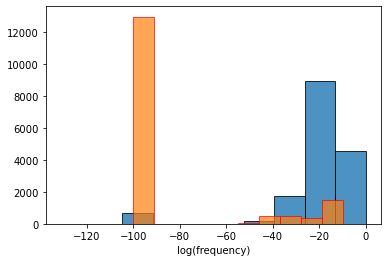

In [15]:
#print the histogram. 
#Looking at the visualization we can conclude that there is not clear threshold for the probability to classify dgas from legit.
#Classify by threshold is probably not the best way.
#Further down I will classify by threshold, calculate confusion matrix and accuracy_score.


plt.hist(dgas, bins = 10,edgecolor="black", alpha=.8)
plt.hist(legits, bins =10, edgecolor="red", alpha=.7)
plt.xlabel("log(frequency)")
plt.show()


In [16]:
#X_test frequency has been already calculated
#predicting y_pred with a threshold classifier.
X_test_frequency
y_pred =[]
threshold = -40


for i in X_test_frequency:
    if i > threshold:
        y_pred.append(0)
    else:
        y_pred.append(1)


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
#(True Positive + True Negative) / Total Predictions
print(accuracy_score(y_test, y_pred))
#Of the positives predicted, what percentage is truly positive? True Positive / (True Positive + False Positive)
print(precision_score(y_test, y_pred))
#Of all the positive cases, what percentage are predicted positive? True Positive / (True Positive + False Negative)
print(recall_score(y_test, y_pred))


[[15341   829]
 [ 2526 13304]]
0.89515625
0.9413429562017972
0.8404295641187618
